In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

<IPython.core.display.Javascript object>


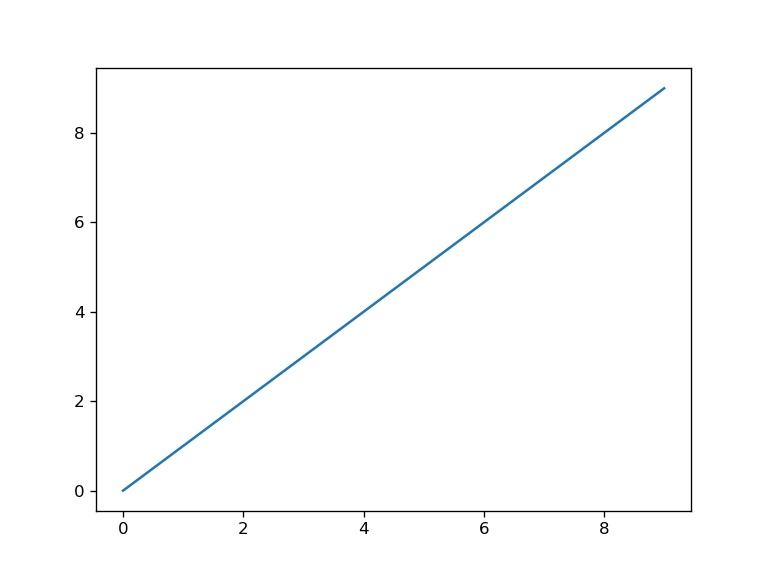

[]

In [2]:
plt.plot()

In [3]:
data = np.arange(10)
plt.plot(data)

<IPython.core.display.Javascript object>


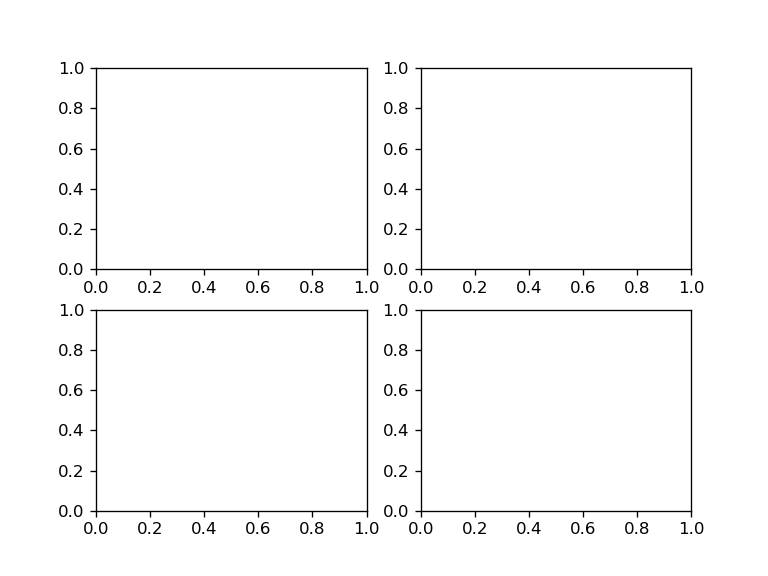

In [4]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

<IPython.core.display.Javascript object>


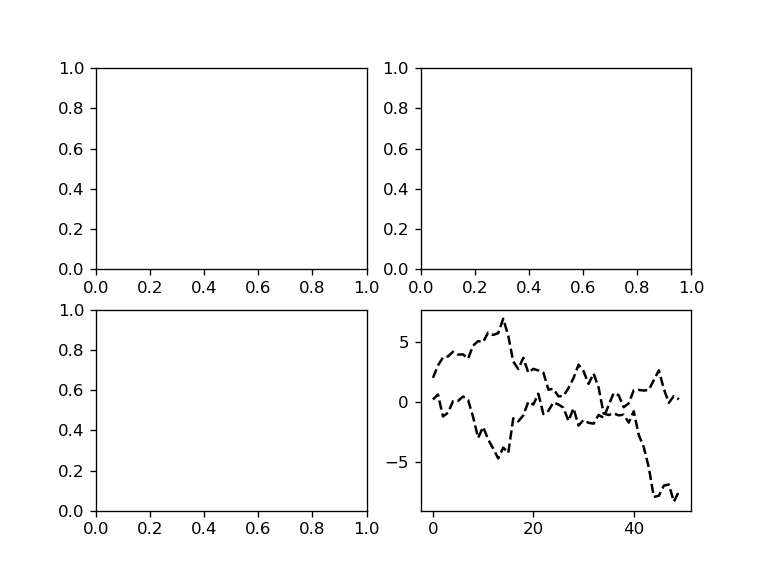

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

plt.plot(np.random.randn(50).cumsum(), 'k--') # added to the latest one, if not specified
plt.plot(np.random.randn(50).cumsum(), 'k--') # added to the latest one, if not specified

<IPython.core.display.Javascript object>


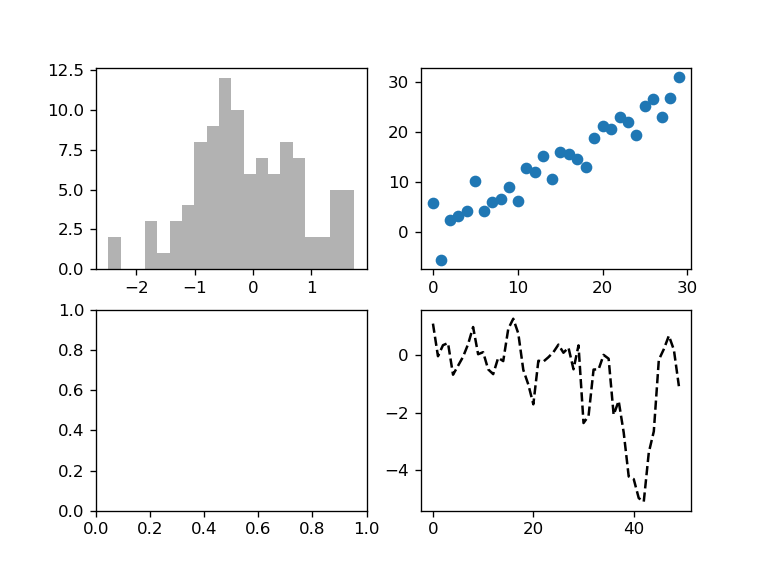

In [6]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

plt.plot(np.random.randn(50).cumsum(), 'k--')

<IPython.core.display.Javascript object>


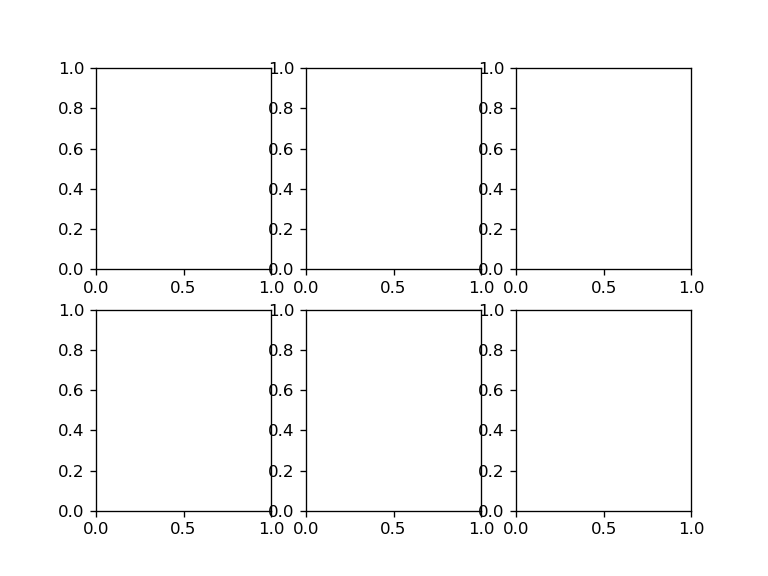

Figure(640x480)
[[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:> <AxesSubplot:>]]


In [7]:
fig, axes = plt.subplots(2, 3)

print(fig)
print(axes)

<IPython.core.display.Javascript object>


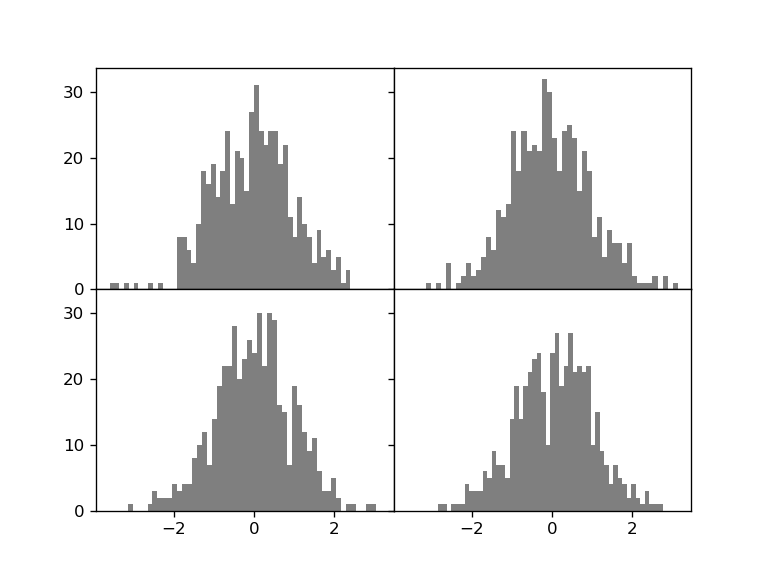

In [8]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

<IPython.core.display.Javascript object>


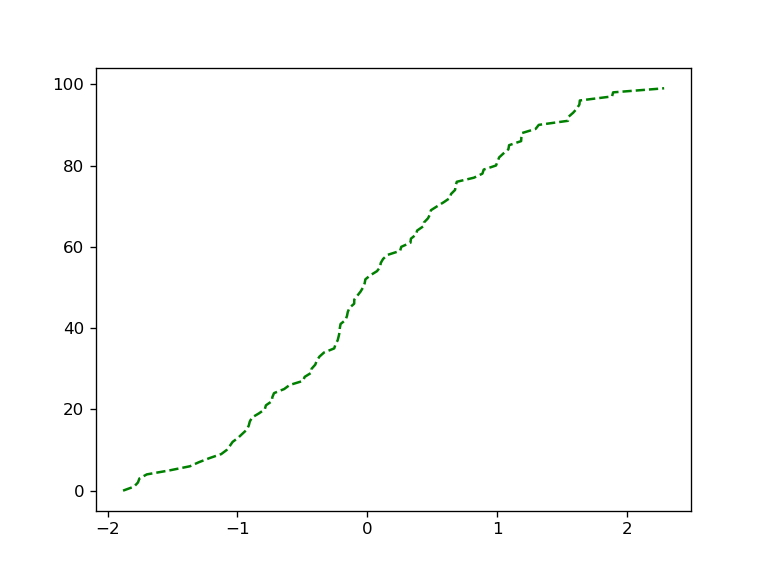

<IPython.core.display.Javascript object>


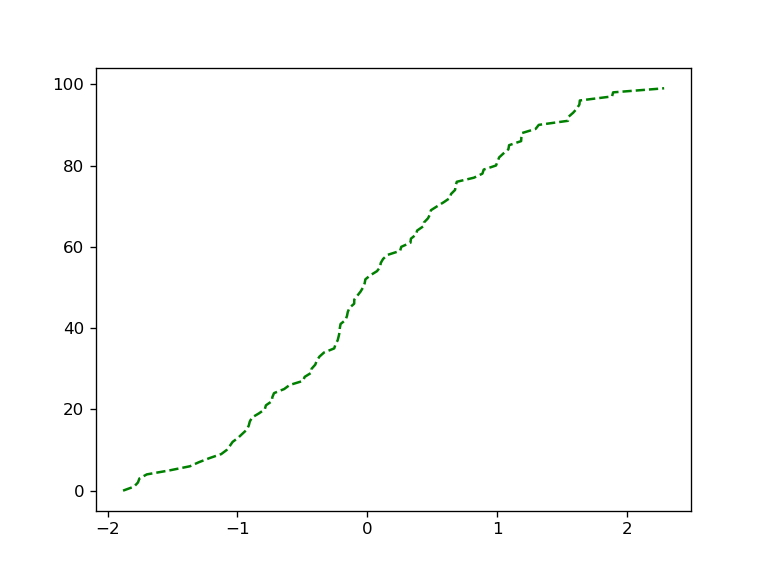

In [9]:
x = sorted(np.random.randn(100))
y = range(100)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y, linestyle='--', color='g')

# same as above
__, ax = plt.subplots()
ax.plot(x, y, linestyle='--', color='g')

<IPython.core.display.Javascript object>


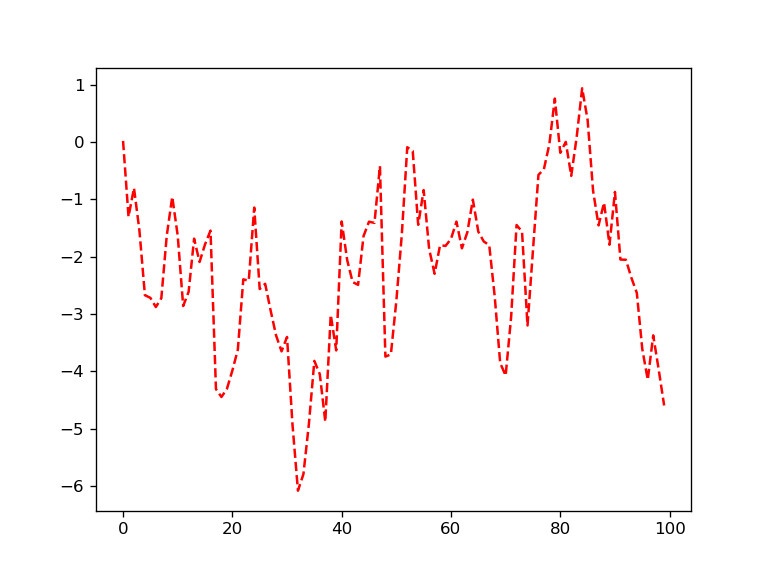

In [10]:
import random
random.seed(10)

x = range(100)
y = np.random.randn(100).cumsum()

fig = plt.figure()
plt.plot(x, y, linestyle='--', color='red')

<IPython.core.display.Javascript object>


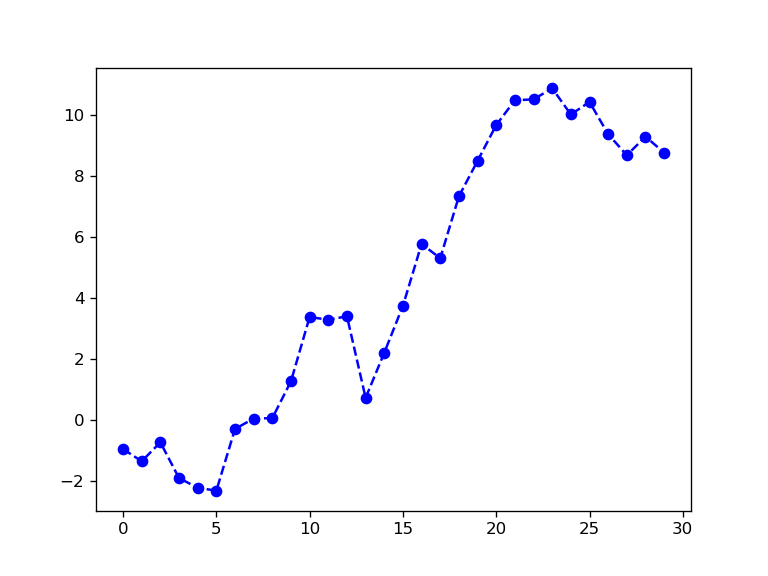

In [11]:
plt.figure() # fig = was dropped
plt.plot(np.random.randn(30).cumsum(), color='b', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


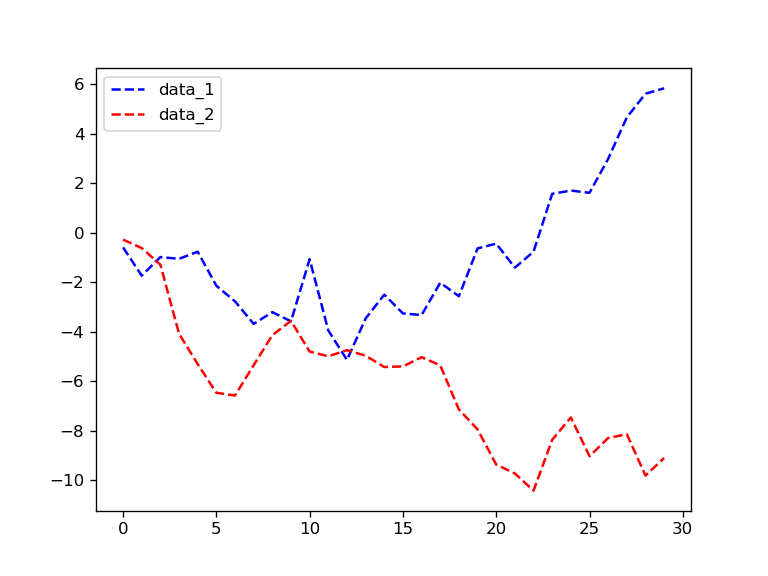

In [12]:
data_1 = np.random.randn(30).cumsum()
data_2 = np.random.randn(30).cumsum()

plt.figure()
plt.plot(data_1, 'k--', label='data_1', color = "blue")
plt.plot(data_2, 'k--', label='data_2', color = "red")
plt.legend(loc='best')

<IPython.core.display.Javascript object>


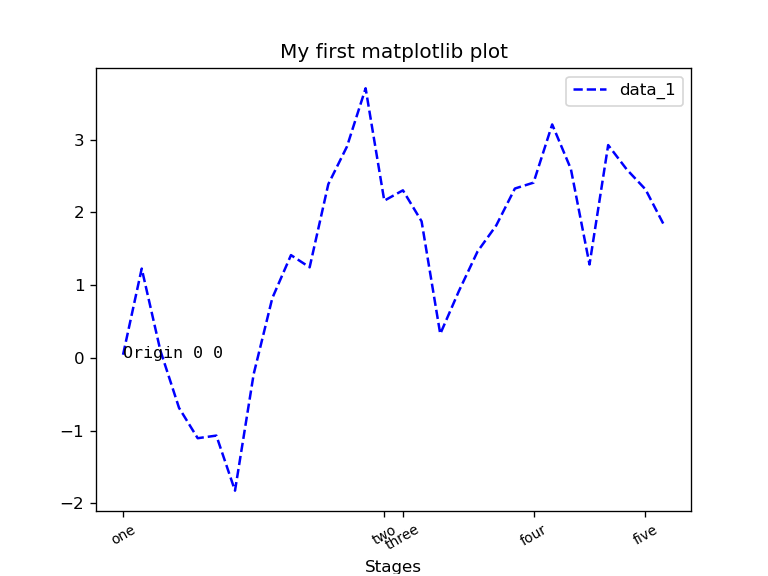

In [13]:
data_1 = np.random.randn(30).cumsum()

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(data_1, 'k--', label='data_1', color = "blue")
ax.set_xticks([0, 14, 15, 22, 28])
ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

ax.text(0, 0, 'Origin 0 0',family='monospace', fontsize=10)

plt.legend(loc='best')

# Histogram

<IPython.core.display.Javascript object>


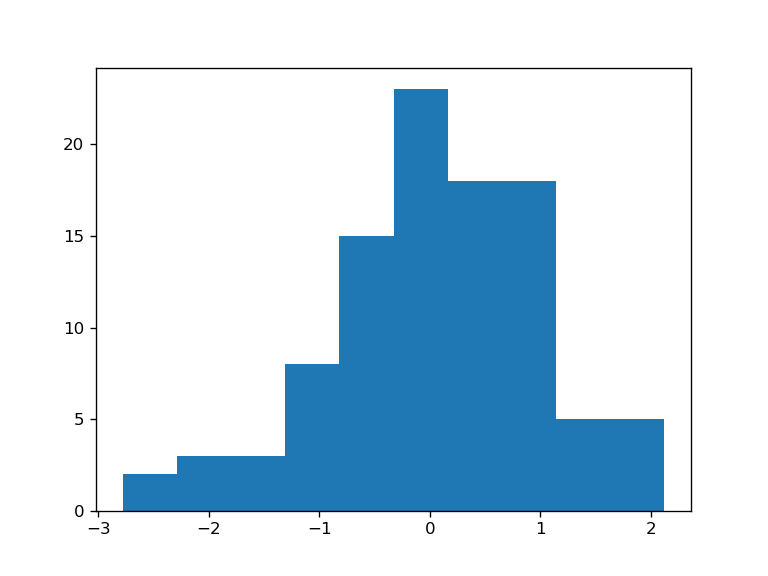

(array([ 2.,  3.,  3.,  8., 15., 23., 18., 18.,  5.,  5.]),
 array([-2.77748695, -2.28760131, -1.79771567, -1.30783002, -0.81794438,
        -0.32805874,  0.16182691,  0.65171255,  1.14159819,  1.63148384,
         2.12136948]),
 <BarContainer object of 10 artists>)

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)

ax1.hist(np.random.randn(100)) # , bins=20, color='k', alpha=0.3


# Extras

#### Save an image ti disk

<IPython.core.display.Javascript object>


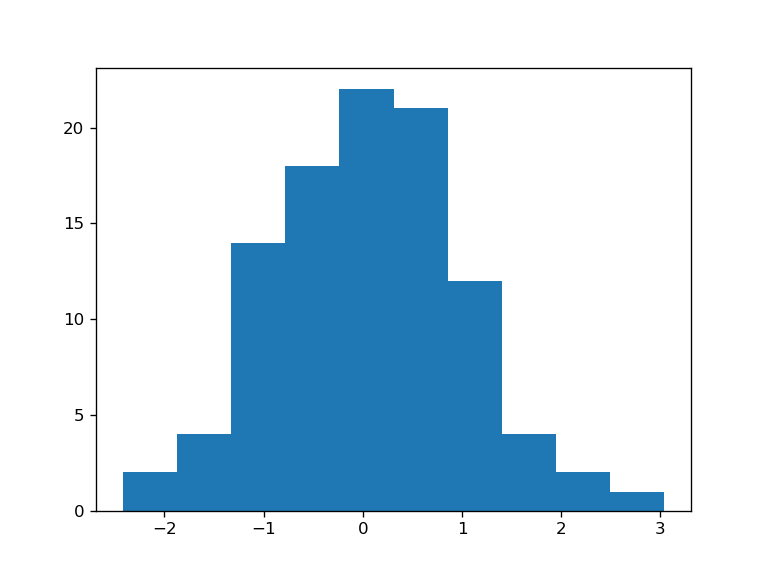

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.hist(np.random.randn(100)) # , bins=20, color='k', alpha=0.3
plt.savefig('figpath.jpg')

# Subplots

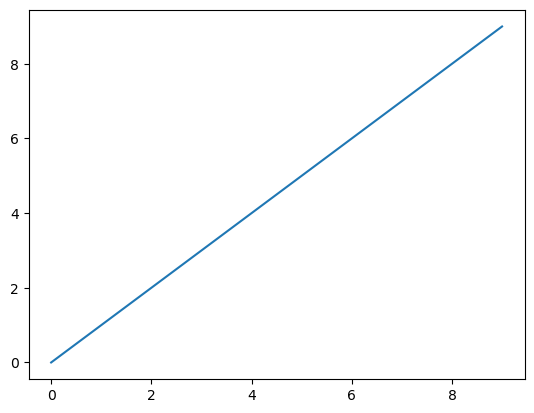

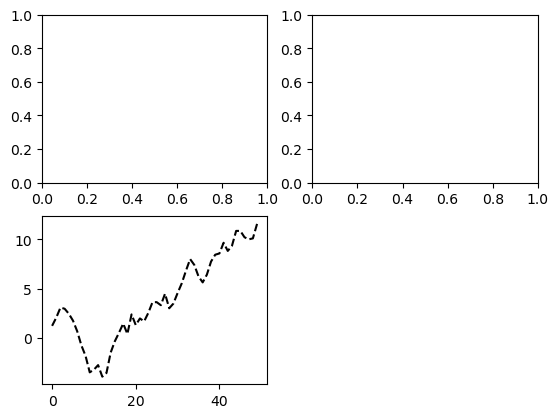

In [1]:
# import pandas as pd
# df = pd.read_csv(r"C:\Users\Ashrith Reddy\My Drive\02_learning\python\01_datatypes\mtcars.csv")

import numpy as np
data = np.arange(10)

import matplotlib.pyplot as plt
plt.plot(data)

# create a new figure
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.plot(np.random.randn(50).cumsum(), 'k--')